Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.88      0.82      4444
     Neutral       0.88      0.67      0.76      3679
    Positive       0.79      0.83      0.81      4101

    accuracy                           0.80     12224
   macro avg       0.81      0.79      0.79     12224
weighted avg       0.81      0.80      0.80     12224

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      4444
     Neutral       0.91      0.82      0.86      3679
    Positive       0.84      0.90      0.87      4101

    accuracy                           0.87     12224
   macro avg       0.88      0.87      0.87     12224
weighted avg       0.88      0.87      0.87     12224



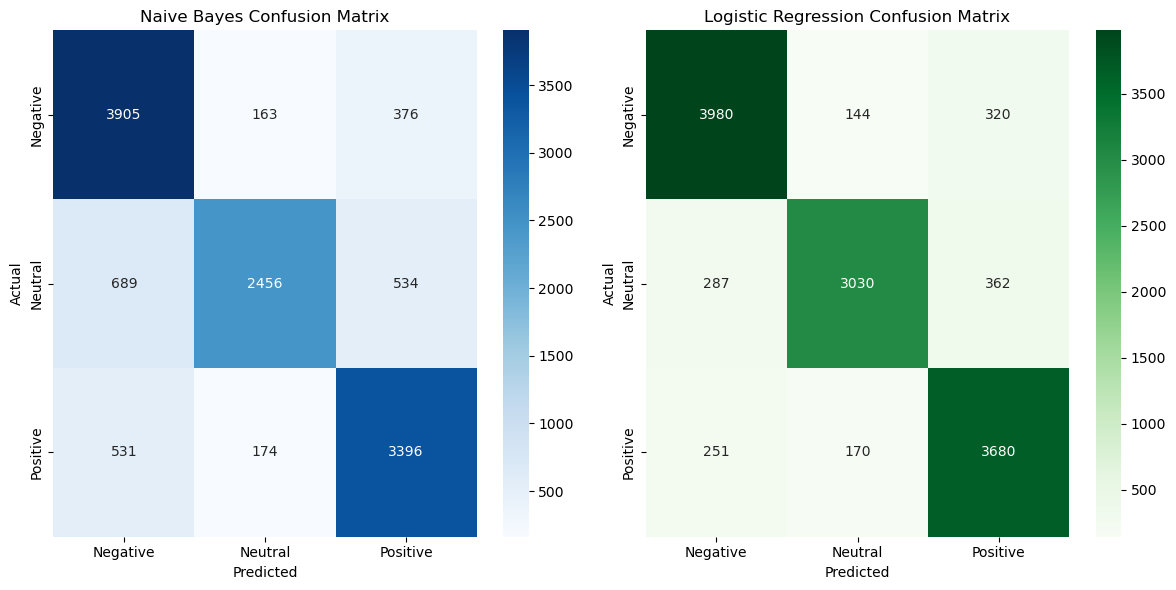

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "./DATASET/Sentiment.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Rename columns for easier handling (adjust based on actual file structure)
data.columns = ['TweetID', 'Entity', 'Sentiment', 'Tweet']

# Filter out irrelevant sentiment
filtered_data = data[data['Sentiment'] != 'Irrelevant'].copy()

# Handle missing values in the 'Tweet' columnjup
filtered_data.dropna(subset=['Tweet'], inplace=True)

# Encode target labels
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
filtered_data['Sentiment'] = filtered_data['Sentiment'].map(label_mapping)

# Extract features and labels
X = filtered_data['Tweet']
y = filtered_data['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Option 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)
nb_y_pred = nb_model.predict(X_test_vect)

# Option 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)
lr_y_pred = lr_model.predict(X_test_vect)

# Evaluate both models
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred, target_names=['Negative', 'Neutral', 'Positive']))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Visualization: Confusion Matrices
nb_cm = confusion_matrix(y_test, nb_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Naive Bayes Confusion Matrix
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

